<a href="https://colab.research.google.com/github/Stonetenth2005/Machine-Learning/blob/main/15-MissingNumericalData/arbitrary_imputer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

In [ ]:
df = pd.read_csv('/content/titanic_toy.csv')

In [ ]:
X_test, X_train, y_test, y_train = train_test_split(df.drop(columns=['Survived']), df['Survived'], test_size=0.2, random_state=42)

# Using Pandas

In [ ]:
X_train['Age_99'] = X_train['Age'].fillna(99)
X_train['Age_minus1'] = X_train['Age'].fillna(-1)

X_train['Fare_99'] = X_train['Fare'].fillna(99)
X_train['Fare_minus1'] = X_train['Fare'].fillna(-1)

X_train.head()

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
709,NaN,15.2458,2,99.0,-1.0,15.2458,15.2458
439,31.0,10.5000,0,31.0,31.0,10.5000,10.5000
840,20.0,7.9250,0,20.0,20.0,7.9250,7.9250
720,6.0,33.0000,1,6.0,6.0,33.0000,33.0000
39,14.0,11.2417,1,14.0,14.0,11.2417,11.2417


### Density Plots for Fare (Original vs. Imputed)

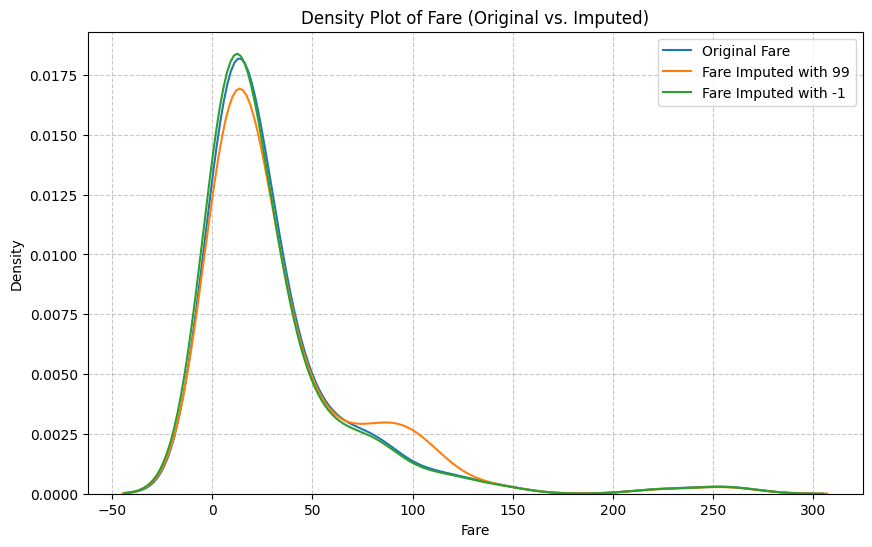

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(X_train['Fare'], label='Original Fare')
sns.kdeplot(X_train['Fare_99'], label='Fare Imputed with 99')
sns.kdeplot(X_train['Fare_minus1'], label='Fare Imputed with -1')
plt.title('Density Plot of Fare (Original vs. Imputed)')
plt.xlabel('Fare')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### Density Plots for Age (Original vs. Imputed)

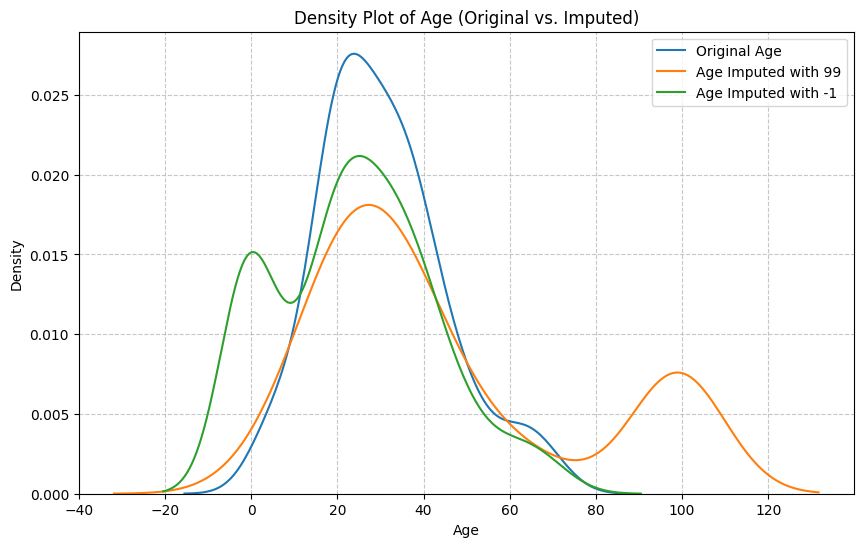

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(X_train['Age'], label='Original Age')
sns.kdeplot(X_train['Age_99'], label='Age Imputed with 99')
sns.kdeplot(X_train['Age_minus1'], label='Age Imputed with -1')
plt.title('Density Plot of Age (Original vs. Imputed)')
plt.xlabel('Age')
plt.ylabel('Density')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

# Using Sklearn

In [ ]:
X_train.drop(columns=['Age_99', 'Age_minus1', 'Fare_99','Fare_minus1'], inplace=True)

In [ ]:
imputer1 = SimpleImputer(strategy='constant', fill_value=99)
imputer2 = SimpleImputer(strategy='constant', fill_value=-1)

trf = ColumnTransformer([
    ('age_99', imputer1, ['Age']),
    ('age_minus1', imputer2, ['Age']),
    ('fare_99', imputer1, ['Fare']),
    ('fare_minus1', imputer2, ['Fare'])
], remainder='passthrough'
)

In [ ]:
X_train

,Age,Fare,Family,Age_99,Age_minus1,Fare_99,Fare_minus1
709,NaN,15.2458,2,99.0,-1.0,15.2458,15.2458
439,31.0,10.5000,0,31.0,31.0,10.5000,10.5000
840,20.0,7.9250,0,20.0,20.0,7.9250,7.9250
720,6.0,33.0000,1,6.0,6.0,33.0000,33.0000
39,14.0,11.2417,1,14.0,14.0,11.2417,11.2417
...,...,...,...,...,...,...,...
433,17.0,7.1250,0,17.0,17.0,7.1250,7.1250
773,NaN,7.2250,0,99.0,-1.0,7.2250,7.2250
25,38.0,31.3875,6,38.0,38.0,31.3875,31.3875
84,17.0,10.5000,0,17.0,17.0,10.5000,10.5000


In [ ]:
X_train_transformed = pd.DataFrame(trf.fit_transform(X_train), columns=trf.get_feature_names_out())
X_test_transformed = pd.DataFrame(trf.transform(X_test), columns=trf.get_feature_names_out())
X_train_transformed.head()

,age_99__Age,age_minus1__Age,fare_99__Fare,fare_minus1__Fare,remainder__Family
0,99.0,-1.0,15.2458,15.2458,2.0
1,31.0,31.0,10.5000,10.5000,0.0
2,20.0,20.0,7.9250,7.9250,0.0
3,6.0,6.0,33.0000,33.0000,1.0
4,14.0,14.0,11.2417,11.2417,1.0
